# Web Scraping the Country Music Hall of Fame

## Import packages

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import re

## 1
Start by using either the inspector or by viewing the page source. Can you identify a tag that might be helpful for finding the names of all inductees? Make use of this to create a list containing just the names of each inductee.

Inductee name tag - h3

In [2]:
URL = 'https://countrymusichalloffame.org/hall-of-fame/members/'

response = requests.get(URL)

In [3]:
type(response)

requests.models.Response

In [4]:
response.status_code

200

In [5]:
response.text

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.e

In [6]:
soup = BS(response.text)

type(soup)

bs4.BeautifulSoup

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=

In [8]:
soup.find('h3')

<h3>Roy Acuff</h3>

In [9]:
type(soup.find('h3'))

bs4.element.Tag

In [10]:
soup.find('h3').text

'Roy Acuff'

In [11]:
inductees = soup.findAll('h3')
print(type(inductees))
inductees

<class 'bs4.element.ResultSet'>


[<h3>Roy Acuff</h3>,
 <h3>Alabama</h3>,
 <h3>Bill Anderson</h3>,
 <h3>Eddy Arnold</h3>,
 <h3>Chet Atkins</h3>,
 <h3>Gene Autry</h3>,
 <h3>DeFord Bailey</h3>,
 <h3>Bobby Bare</h3>,
 <h3>Eddie Bayers</h3>]

In [12]:
inductee_list = [x.get_text('h3') for x in inductees]
inductee_list

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Eddie Bayers']

In [13]:
page = 1
while page !=18:
    url = f"https://countrymusichalloffame.org/hall-of-fame/members/page/{page}"
    print(url)
    page = page + 1

https://countrymusichalloffame.org/hall-of-fame/members/page/1
https://countrymusichalloffame.org/hall-of-fame/members/page/2
https://countrymusichalloffame.org/hall-of-fame/members/page/3
https://countrymusichalloffame.org/hall-of-fame/members/page/4
https://countrymusichalloffame.org/hall-of-fame/members/page/5
https://countrymusichalloffame.org/hall-of-fame/members/page/6
https://countrymusichalloffame.org/hall-of-fame/members/page/7
https://countrymusichalloffame.org/hall-of-fame/members/page/8
https://countrymusichalloffame.org/hall-of-fame/members/page/9
https://countrymusichalloffame.org/hall-of-fame/members/page/10
https://countrymusichalloffame.org/hall-of-fame/members/page/11
https://countrymusichalloffame.org/hall-of-fame/members/page/12
https://countrymusichalloffame.org/hall-of-fame/members/page/13
https://countrymusichalloffame.org/hall-of-fame/members/page/14
https://countrymusichalloffame.org/hall-of-fame/members/page/15
https://countrymusichalloffame.org/hall-of-fame/m

In [14]:
page = 1
inductees =[]
while page !=18:
    url = f"https://countrymusichalloffame.org/hall-of-fame/members/page/{page}"
    response = requests.get(url)
    html = response.content
    soup = BS(html, "lxml")
    for h3 in soup.find_all("h3"):
        inductees.append(h3.get_text(strip=True))
    page = page + 1
    
print(inductees)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Eddie Bayers', 'Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Ray Charles', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens', 'Dean Dillon', 'Pete Drake', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley', 'Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard', 'Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 'Roy Horton',

In [15]:
len(inductees)

147

years = str(soup.findAll(attrs={'class' : 'vertical-card_content--copy'}))
years = re.findall(r"\d{4}", years)

## 2
Next, try and find a tag that could be used to find the year that each member was inducted. Extract these into a list. When you do this, be sure to only include the year and not the full text. For example, for Roy Acuff, the list entry should be "1962" and not "Inducted 1962". Double-check that the resulting list has the correct number of elements and is in the same order as your inductees list.

<a href=" https://countrymusichalloffame.org/artist/roy-acuff/ ">
                <div class="vertical-card_content--title">
                  <h3>Roy Acuff</h3>
                </div>
                <div class="vertical-card_content--copy">
                  <p>
                    Inducted 1962                  </p>
                </div>
                </a>

Will use 'p' to find year of induction

In [17]:
years = soup.findAll('p')
years

[<p style="text-align: center;">Open Daily</p>,
 <p></p>,
 <p>Election to the Country Music Hall of Fame is country music's highest honor. The Country Music Association (CMA), the country music industry's trade organization, created the accolade to recognize significant contributions to the advancement of country music by individuals in both the creative and business communities. The first members—Jimmie Rodgers, Fred Rose, and Hank Williams—were inducted in 1961.</p>,
 <p>
                     Inducted 2014                  </p>,
 <p>
                     Inducted 1998                  </p>,
 <p>
                     Inducted 2000                  </p>,
 <p>STAY UP TO DATE</p>,
 <p>FOLLOW US</p>,
 <p style="text-align: center;">Country Music Hall of Fame and Museum • 222 Rep. John Lewis Way S Nashville, TN 37203 • Phone: 615.416.2001 ©2018 Country Music Hall of Fame® and Museum All Rights Reserved | <a href="https://countrymusichalloffame.org/privacy-policy/">Privacy Policy</a> | <a h

Result indicates that there are a multitude of web elements on the page that use the 'p' tag. Need to isolate induction year more specifically

In [18]:
years = str(soup.findAll(attrs={'class' : 'vertical-card_content--copy'}))
years = re.findall(r"\d{4}", years)

In [19]:
years

['2014', '1998', '2000']

Just shows list from page 17 but confirms that scraper is pulling the correct details.

In [20]:
page = 1
year = []
while page !=18:
    url = f"https://countrymusichalloffame.org/hall-of-fame/members/page/{page}"
    response = requests.get(url)
    html = response.content
    soup = BS(html, "lxml")
    years = str(soup.findAll(attrs={'class' : 'vertical-card_content--copy'}))
    years = re.findall(r"\d{4}", years)
    year.append(years)
    print(url)
    page = page + 1

https://countrymusichalloffame.org/hall-of-fame/members/page/1
https://countrymusichalloffame.org/hall-of-fame/members/page/2
https://countrymusichalloffame.org/hall-of-fame/members/page/3
https://countrymusichalloffame.org/hall-of-fame/members/page/4
https://countrymusichalloffame.org/hall-of-fame/members/page/5
https://countrymusichalloffame.org/hall-of-fame/members/page/6
https://countrymusichalloffame.org/hall-of-fame/members/page/7
https://countrymusichalloffame.org/hall-of-fame/members/page/8
https://countrymusichalloffame.org/hall-of-fame/members/page/9
https://countrymusichalloffame.org/hall-of-fame/members/page/10
https://countrymusichalloffame.org/hall-of-fame/members/page/11
https://countrymusichalloffame.org/hall-of-fame/members/page/12
https://countrymusichalloffame.org/hall-of-fame/members/page/13
https://countrymusichalloffame.org/hall-of-fame/members/page/14
https://countrymusichalloffame.org/hall-of-fame/members/page/15
https://countrymusichalloffame.org/hall-of-fame/m

In [21]:
year

[['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '2022'],
 ['1999', '2011', '2006', '2019', '1974', '1987', '2012', '2019', '2015'],
 ['2015', '1991', '2005', '2002', '1970', '1980', '2022', '2009', '2013'],
 ['1973', '2014', '1976', '2003', '1981', '2016', '1972', '2010', '2001'],
 ['1966', '1983', '2021', '2022', '2007', '2001', '1985', '2004', '1967'],
 ['1990', '2016', '1967', '1982', '1980', '2001', '2007', '2018', '1994'],
 ['2008', '2008', '1966', '2001', '1982', '1997', '2010', '2017', '2006'],
 ['2001', '1992', '1978', '2001', '1974', '2004', '2001', '1997', '1979'],
 ['2001', '1988', '1966', '2009', '2015', '2009', '2011', '1995', '2014'],
 ['1970', '1996', '1998', '2001', '1993', '2015', '1996', '1999', '1975'],
 ['1984', '2001', '2001', '1998', '1992', '1996', '2000', '2017', '1967'],
 ['1964', '2012', '1982', '1961', '2013', '1988', '1961', '1986', '1971'],
 ['2017', '2011', '2010', '1967', '2018', '2003', '2012', '1979', '1980'],
 ['1989', '2019', '1989',

In [22]:
flat_list=list()
for sub_list in year:
    flat_list += sub_list
year = flat_list
year

['1962',
 '2005',
 '2001',
 '1966',
 '1973',
 '1969',
 '2005',
 '2013',
 '2022',
 '1999',
 '2011',
 '2006',
 '2019',
 '1974',
 '1987',
 '2012',
 '2019',
 '2015',
 '2015',
 '1991',
 '2005',
 '2002',
 '1970',
 '1980',
 '2022',
 '2009',
 '2013',
 '1973',
 '2014',
 '1976',
 '2003',
 '1981',
 '2016',
 '1972',
 '2010',
 '2001',
 '1966',
 '1983',
 '2021',
 '2022',
 '2007',
 '2001',
 '1985',
 '2004',
 '1967',
 '1990',
 '2016',
 '1967',
 '1982',
 '1980',
 '2001',
 '2007',
 '2018',
 '1994',
 '2008',
 '2008',
 '1966',
 '2001',
 '1982',
 '1997',
 '2010',
 '2017',
 '2006',
 '2001',
 '1992',
 '1978',
 '2001',
 '1974',
 '2004',
 '2001',
 '1997',
 '1979',
 '2001',
 '1988',
 '1966',
 '2009',
 '2015',
 '2009',
 '2011',
 '1995',
 '2014',
 '1970',
 '1996',
 '1998',
 '2001',
 '1993',
 '2015',
 '1996',
 '1999',
 '1975',
 '1984',
 '2001',
 '2001',
 '1998',
 '1992',
 '1996',
 '2000',
 '2017',
 '1967',
 '1964',
 '2012',
 '1982',
 '1961',
 '2013',
 '1988',
 '1961',
 '1986',
 '1971',
 '2017',
 '2011',
 '2010',
 

## 3
Take the two lists you created on parts 1 and 2 and convert it into a pandas DataFrame.

In [23]:
hof_members = {'Inductee': inductees, 'Year' : year}
hof_members = pd.DataFrame(hof_members)

In [24]:
hof_members.head(10)

,Inductee,Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Eddie Bayers,2022
9,Johnny Bond,1999


.head(10) confirms that scraper merge and scaper(s) are working successfully.

In [28]:
hof_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Inductee  147 non-null    object
 1   Year      147 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [31]:
#hof_members['Year'].astype(str).astype(int)

0      1962
1      2005
2      2001
3      1966
4      1973
       ... 
142    2021
143    1968
144    2014
145    1998
146    2000
Name: Year, Length: 147, dtype: int32

In [34]:
#hof_members.dtypes

Inductee    object
Year        object
dtype: object

In [35]:
#pd.to_numeric(hof_members['Year'], errors='coerce').convert_dtypes()

0      1962
1      2005
2      2001
3      1966
4      1973
       ... 
142    2021
143    1968
144    2014
145    1998
146    2000
Name: Year, Length: 147, dtype: Int64

In [36]:
#hof_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Inductee  147 non-null    object
 1   Year      147 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [37]:
hof_members['Year'] = pd.to_numeric(hof_members['Year'])

In [39]:
hof_members.dtypes
#victory!

Inductee    object
Year         int64
dtype: object

## 4
Added while loops to capture all 17 pages as parts of questions 1 and 2 to begin with.

## 5
Create a visual using the data that you scraped. Prepare a short (<5 minute) presentation.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ipywidgets import interactive

In [40]:
def assign_decade(row):
    if row <= 1969:
        result = "1960s"
    elif row <= 1979:
        result = "1970s"
    elif row <= 1989:
        result = "1980s"
    elif row <= 1999:
        result = "1990s"
    elif row <= 2009:
        result = "2000s"
    elif row <= 2019:
        result = "2010s"
    else:
        result = "2020s"
    return result

hof_members['Decade_Inducted'] = hof_members['Year'].apply(assign_decade)
hof_members.head(10)

,Inductee,Year,Decade_Inducted
0,Roy Acuff,1962,1960s
1,Alabama,2005,2000s
2,Bill Anderson,2001,2000s
3,Eddy Arnold,1966,1960s
4,Chet Atkins,1973,1970s
5,Gene Autry,1969,1960s
6,DeFord Bailey,2005,2000s
7,Bobby Bare,2013,2010s
8,Eddie Bayers,2022,2020s
9,Johnny Bond,1999,1990s


In [43]:
hof_members.Decade_Inducted.value_counts()

2000s    36
2010s    32
1990s    21
1980s    20
1960s    16
1970s    15
2020s     7
Name: Decade_Inducted, dtype: int64

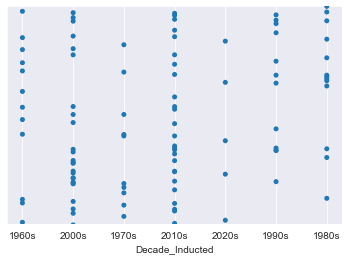

In [58]:
sns.stripplot(x=hof_members['Decade_Inducted'], jitter=.75)
plt.xticks(['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']);

C:\Users\cbrown\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


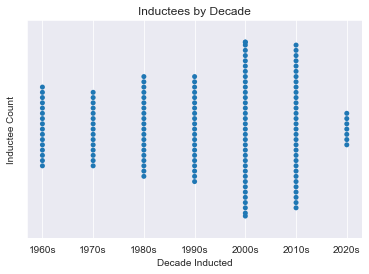

In [60]:
sns.swarmplot(hof_members.Decade_Inducted)
plt.ylabel('Inductee Count')
plt.xlabel('Decade Inducted')
plt.title('Inductees by Decade');

## Bonus
If you navigate to Roy Acuff's page, you will see that his date of birth and date of death are listed towards the top of the page, along with his birthplace. Write some code that will extract these three values. Once you get it working for Roy Acuff, figure out how you can automatically extract these values across the whole dataset of artists. In doing this, you'll need to figure out a way to automatically determine the correct urls for each artist. Note also that not every artist will have these three values, so write your code in a way that it can handle cases where these values are missing. Alabama is one such example.

In [62]:
url = "https://countrymusichalloffame.org/artist/roy-acuff/"
response = requests.get(url)
print(response)

<Response [200]>


In [63]:
html = response.content
print(html)

b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.

In [64]:
soup = BS(html, "lxml")
print(soup)

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},

In [68]:
soup(style="margin-top")

[]

In [71]:
soup.find('div').findAll('p')


[<p style="text-align: center;">Open Daily</p>,
 <p>INDUCTED :  1962</p>,
 <p></p>,
 <p>Roy Claxton Acuff emerged as a star during the early 1940s.</p>,
 <p style="margin-top: 20px;color: #50565A;font-size: 14px;font-weight: 500;letter-spacing: 1.5px;line-height: 25px; text-transform: uppercase;">Birth: September 15, 1903 - Death: November 23, 1992 <br/> Birthplace: Maynardville, Tennessee </p>,
 <p class="p1"><span class="s1"><p>He helped intensify the star system at the Grand Ole Opry and remained its leading personality until his death. In so doing, he formed the bridge between country’s rural stringband era and the modern era of star singers backed by fully amplified bands. In addition, he co-founded Acuff-Rose Publications with songwriter Fred Rose, thus laying an important cornerstone of the Nashville music industry. For these and other accomplishments he was elected to the Country Music Hall of Fame in 1962 as its first living member.</p>
 </span></p>,
 <p>He helped intensify th

In [72]:
soup.p.attrs['style']

'text-align: center;'

In [73]:
soup.find_all("p", string = "Birth")

[]

In [75]:
paragraph = soup.find_all('div', class_="fl-rich-text detail-wrapper")